In [ ]:
import pandas as pd
confirmed = pd.read_csv('/content/time_series_covid19_confirmed_US.csv')
deaths = pd.read_csv('/content/time_series_covid19_deaths_US.csv')


In [ ]:
# Check data head and tail
print(confirmed.head())
print(confirmed.tail())




        UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
0  84001001   US  USA    840  1001.0  Autauga        Alabama             US   
1  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
2  84001005   US  USA    840  1005.0  Barbour        Alabama             US   
3  84001007   US  USA    840  1007.0     Bibb        Alabama             US   
4  84001009   US  USA    840  1009.0   Blount        Alabama             US   

         Lat      Long_  ... 2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  \
0  32.539527 -86.644082  ...   19732   19759   19759   19759   19759   19759   
1  30.727750 -87.722071  ...   69641   69767   69767   69767   69767   69767   
2  31.868263 -85.387129  ...    7451    7474    7474    7474    7474    7474   
3  32.996421 -87.125115  ...    8067    8087    8087    8087    8087    8087   
4  33.982109 -86.567906  ...   18616   18673   18673   18673   18673   18673   

   3/6/23  3/7/23  3/8/23  3/9/23  
0   1975

In [ ]:
confirmed.describe()
deaths.describe()


,UID,code3,FIPS,Lat,Long_,Population,1/22/20,1/23/20,1/24/20,1/25/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
count,3.342000e+03,3342.000000,3332.000000,3342.000000,3342.000000,3.342000e+03,3342.000000,3342.000000,3342.000000,3342.000000,...,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000
mean,8.342992e+07,834.494913,33043.078932,36.721617,-88.642045,9.960357e+04,0.000299,0.000299,0.000299,0.000299,...,335.103830,335.397068,335.624776,335.776481,335.778576,335.767205,335.781269,335.881508,336.099940,336.276481
std,4.314076e+06,36.487378,18648.808931,9.079322,21.776287,3.241661e+05,0.017298,0.017298,0.017298,0.017298,...,1103.909631,1104.435933,1105.572242,1105.748480,1105.751727,1105.746239,1105.772895,1105.924446,1106.230834,1107.369648
min,1.600000e+01,16.000000,60.000000,-14.271000,-174.159600,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.401811e+07,840.000000,19076.500000,33.896803,-97.803595,9.917250e+03,0.000000,0.000000,0.000000,0.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,39.000000,39.000000
50%,8.402921e+07,840.000000,31012.000000,38.005610,-89.488865,2.489150e+04,0.000000,0.000000,0.000000,0.000000,...,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
75%,8.404612e+07,840.000000,47129.500000,41.579255,-82.313398,6.497525e+04,0.000000,0.000000,0.000000,0.000000,...,245.750000,245.750000,245.750000,246.000000,246.000000,246.000000,246.000000,246.750000,246.750000,246.750000
max,8.410000e+07,850.000000,99999.000000,69.314792,145.673900,1.003911e+07,1.000000,1.000000,1.000000,1.000000,...,35366.000000,35366.000000,35453.000000,35453.000000,35453.000000,35453.000000,35453.000000,35453.000000,35453.000000,35545.000000


In [ ]:
# Check for missing values
print(confirmed.isnull().sum())

# Select only numeric columns for filling missing values
numeric_columns = confirmed.select_dtypes(include=['number']).columns
confirmed[numeric_columns] = confirmed[numeric_columns].fillna(confirmed[numeric_columns].mean())

UID       0
iso2      0
iso3      0
code3     0
FIPS      0
         ..
3/5/23    0
3/6/23    0
3/7/23    0
3/8/23    0
3/9/23    0
Length: 1154, dtype: int64


In [ ]:
merged = pd.merge(confirmed, deaths, on='Combined_Key')


<ipython-input-6-5cc50a9411c2>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  confirmed_melted['date'] = pd.to_datetime(confirmed_melted['date'])


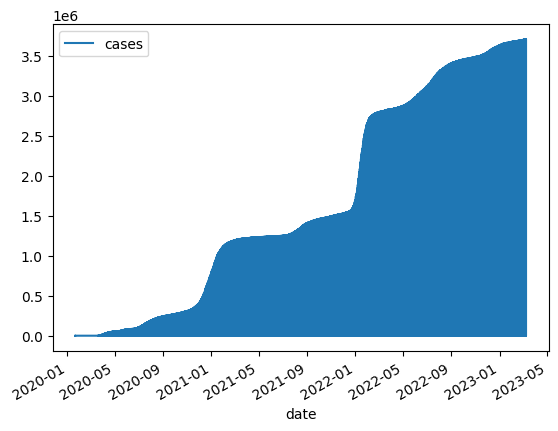

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming dates are in columns from 4th column onwards
confirmed_melted = confirmed.melt(id_vars=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
                                          'Country_Region', 'Lat', 'Long_', 'Combined_Key'],
                                   var_name='date', value_name='cases')

# Convert 'date' column to datetime if needed
confirmed_melted['date'] = pd.to_datetime(confirmed_melted['date'])

# Now you can plot
confirmed_melted.plot(x='date', y='cases', kind='line')
plt.show()

In [ ]:
# Calculate daily and weekly changes on the melted DataFrame
confirmed_melted['daily_change'] = confirmed_melted['cases'].diff()
confirmed_melted['weekly_change'] = confirmed_melted['cases'].diff(7)

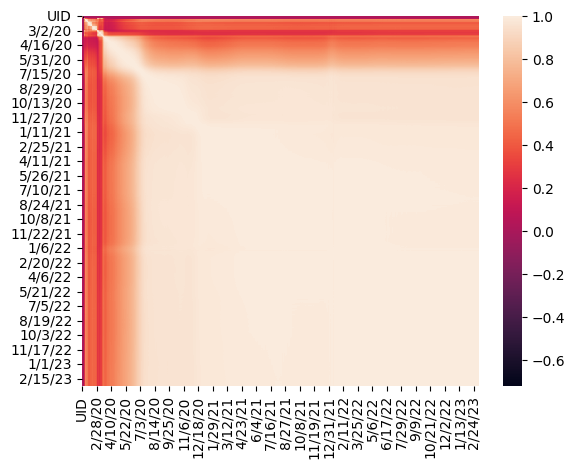

In [ ]:
import pandas as pd
import seaborn as sns

# Select only numerical columns for correlation calculation
numerical_confirmed = confirmed.select_dtypes(include=['number'])

# Calculate correlation matrix
corr_matrix = numerical_confirmed.corr()

# Plot heatmap
sns.heatmap(corr_matrix)
plt.show()

In [ ]:
train_size = int(len(confirmed) * 0.8)
train, test = confirmed[0:train_size], confirmed[train_size:len(confirmed)]


In [ ]:
import statistics

# Extract numerical values from the correct column of the DataFrame
# Assuming the column containing the case numbers is named 'cases'
data = confirmed['FIPS'].tolist()

# Calculate the mean
mean_value = statistics.mean(data)

print("The mean of the cases is:", mean_value)

The mean of the cases is: nan
